In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

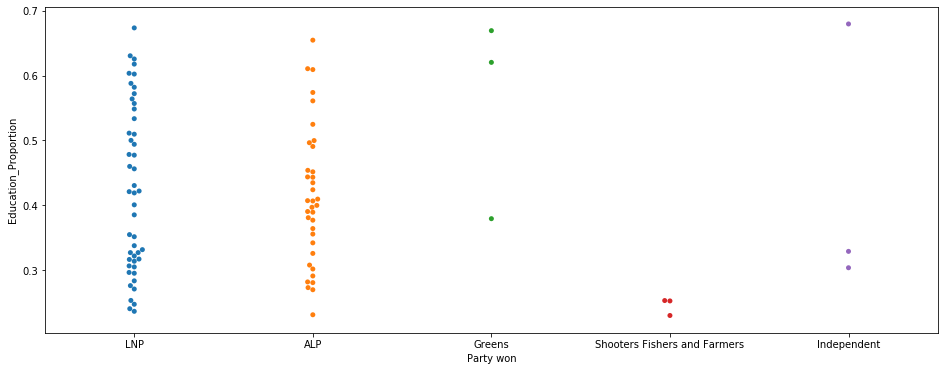

In [2]:
NSWResult=pd.read_csv('Clean Data/NSWFull.csv')
NSWResult = NSWResult.replace(to_replace ="Green", value ="Greens") 
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Education_Proportion', data=NSWResult)

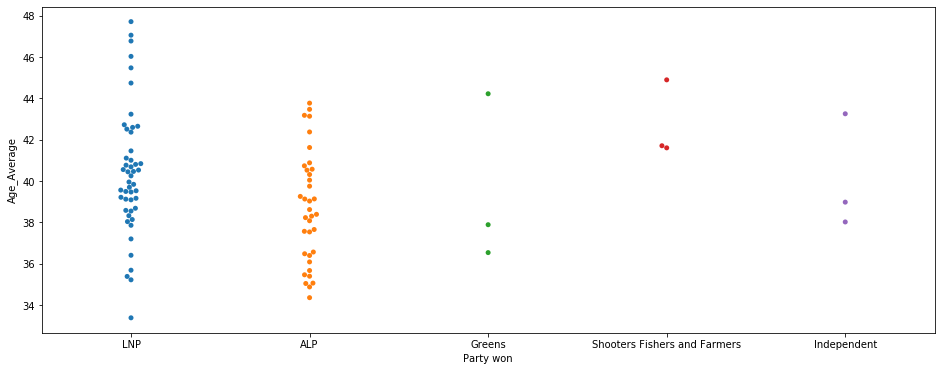

In [3]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Age_Average', data=NSWResult)

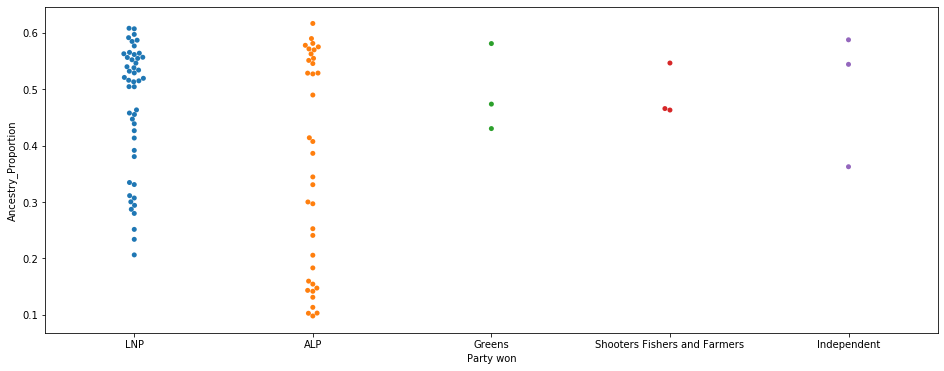

In [4]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Ancestry_Proportion', data=NSWResult)

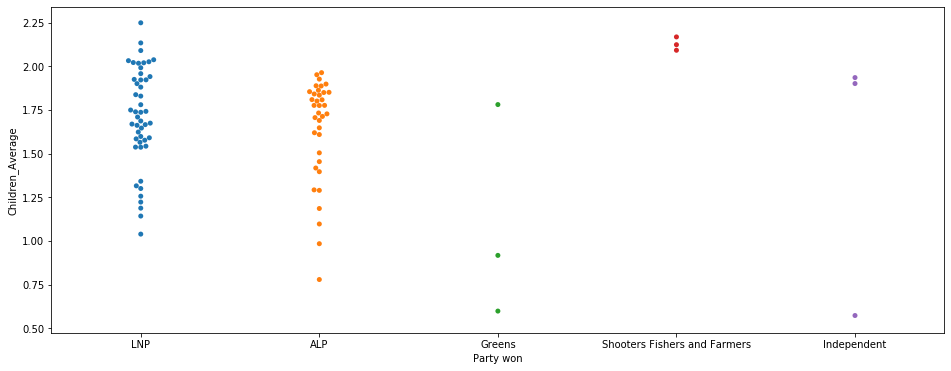

In [5]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Children_Average', data=NSWResult)

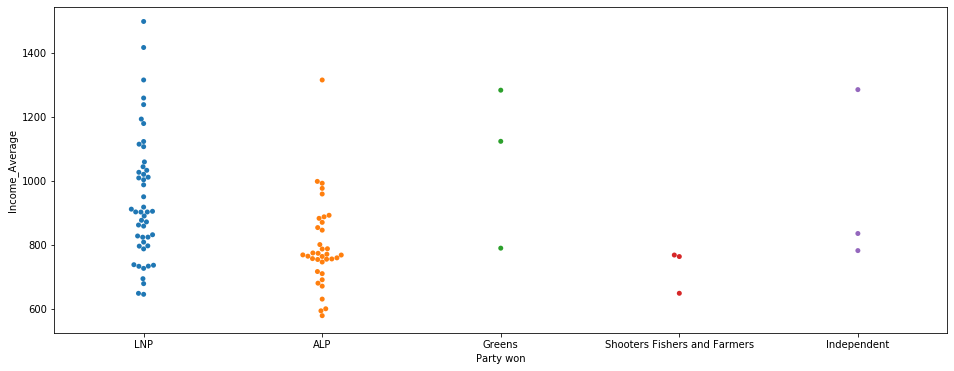

In [6]:
plt.figure(figsize=(16, 6))
sns.swarmplot(x='Party won', y='Income_Average', data=NSWResult)

### Difference in factors that affect vote results

In [7]:
NSWResult.drop(labels="Unnamed: 0",axis=1,inplace=True)
NSWResult.head()

,Name,Ancestry_Proportion,Education_Proportion,Age_Average,Children_Average,Income_Average,Party won
0,Albury,0.561347,0.306550,41.462241,1.957339,787.124060,LNP
1,Auburn,0.102925,0.490746,34.877516,1.503916,690.836679,ALP
2,Ballina,0.580751,0.379375,44.227358,1.780289,789.434557,Greens
3,Balmain,0.473518,0.620436,37.889434,0.916856,1282.443970,Greens
4,Bankstown,0.131282,0.409595,36.483350,1.800435,630.460980,ALP


In [8]:
melted_df = pd.melt(NSWResult, 
                    id_vars=["Name", "Party won"],
                    var_name="Stat")
melted_df.head()

,Name,Party won,Stat,value
0,Albury,LNP,Ancestry_Proportion,0.561347
1,Auburn,ALP,Ancestry_Proportion,0.102925
2,Ballina,Greens,Ancestry_Proportion,0.580751
3,Balmain,Greens,Ancestry_Proportion,0.473518
4,Bankstown,ALP,Ancestry_Proportion,0.131282


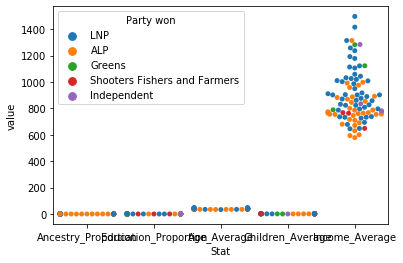

In [9]:
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Party won')

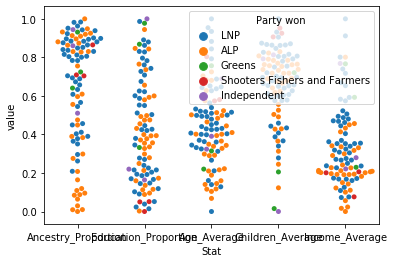

In [10]:
for column in ['Ancestry_Proportion', 'Education_Proportion', 'Age_Average','Children_Average', 'Income_Average']:
    NSWResult[column]=(NSWResult[column]-NSWResult[column].min())/(NSWResult[column].max()-NSWResult[column].min())
melted_df = pd.melt(NSWResult, 
                    id_vars=["Name", "Party won"],
                    var_name="Stat")
melted_df.head()
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Party won')